###### Isabella Kobb Fernando, 11080015
## Tarefa 1
1) Modelagem mecânica do problema. 2. Gráficos dos dados experimentais (força de reação do solo) e da aceleração, velocidade e deslocamento vertical e potência mecânica do centro de gravidade do sujeito. 3. Identificação das fases do salto. 4. Estimativa da altura do salto pelo tempo de vôo e pela variação da quantidade de movimento.

In [81]:
#importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
sns.set_context('notebook', font_scale=1.2)
import sys, os
#Determinando as constantes
g = 9.81 #aceleração da gravidade

In [82]:
#carregando os dados
fname = './salto_diurno.txt.forces' #vai digitando ./ e clicando em tab até achar o arquivo

print(fname)

./salto_diurno.txt.forces


In [83]:
#carregando os dados usando "pandas"
dado = pd.read_csv(fname, sep='\t', skiprows=4, header = 0, index_col=None, usecols=['FY5'], engine ='c').values
dado

array([[-0.],
       [-0.],
       [-0.],
       ...,
       [-0.],
       [-0.],
       [-0.]])

In [84]:
print(dado.shape)

(4500, 1)


## Carregando os dados de força
Plataforma 5 do laboratório

In [85]:
#carregando os dados usando "pandas" 
Fx5 = pd.read_csv(fname, sep='\t', skiprows=4, header = 0, index_col=None, usecols=['FY5'], engine ='c').values[:,0] #unidimensional
print(Fx5.shape)

(4500,)


In [86]:
w = 450 #freq em hz
t = np.linspace(0, (len (Fx5)-1)/w, len(Fx5))
print(t[: 10])
#np.mean(1/np.diff(t)) verificar se esta espaçado em 450

[0.         0.00222222 0.00444444 0.00666667 0.00888889 0.01111111
 0.01333333 0.01555556 0.01777778 0.02      ]


In [87]:
#outra forma para criar o vetor tempo usando a 1a coluna
tempo = pd.read_csv(fname, sep='\t', skiprows=4, header = 0, index_col=None, usecols=['#Sample'], engine ='c').values[:,0] #unidimensional
w = 450 #freq em hz
tp = tempo/450
tp

array([2.22222222e-03, 4.44444444e-03, 6.66666667e-03, ...,
       9.99555556e+00, 9.99777778e+00, 1.00000000e+01])

## Plotando os dados obtidos (Força X tempo)

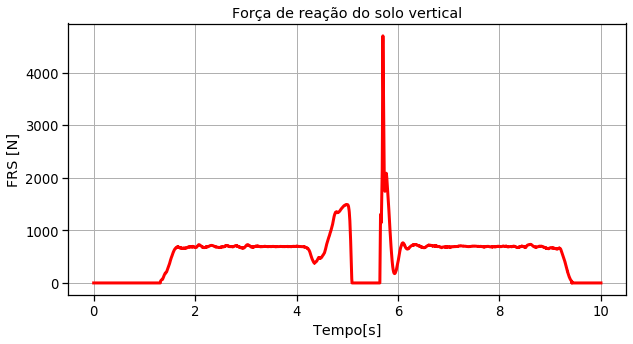

In [88]:
#plotando os dados
plt.figure(figsize=(10,5))
plt.plot(tp, Fx5, 'r', lw=3)
plt.title('Força de reação do solo vertical')
plt.xlabel('Tempo[s]')
plt.ylabel('FRS [N]')
plt.grid()
plt.show()

## Massa em Kg

In [90]:
#Calculando a massa do indivíduo (kg)
mass = Fx5[900:4*450].mean()/g
mass

70.6047570506286

In [91]:
force = Fx5 - mass*g